In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Here I tried to study the link between the timestamp and the number of retweet

In [52]:
# Load the training data
tweet_dataset = pd.read_csv("data/train.csv")
# Trying to work with log(retweet_count + 1)
tweet_dataset.retweet_count = tweet_dataset.retweet_count.apply(lambda x: np.log(x+1))

In [53]:
ds = tweet_dataset[['retweet_count', 'timestamp']].copy()
def timestamp_13_digits_to_hour(t):
    dt = datetime.fromtimestamp(t / 1000)
    return dt.hour
ds.timestamp = ds.timestamp.apply(timestamp_13_digits_to_hour)

In [55]:
retweet_mean_per_hour = []
for h in range(24):
    retweet_mean_per_hour.append(ds[ds.timestamp == h].retweet_count.mean())

First, we can see that the number of tweet posted depends on the hour of the day. The active period is roughly from 13:00 to 02:00, and it is less active during the night and morning

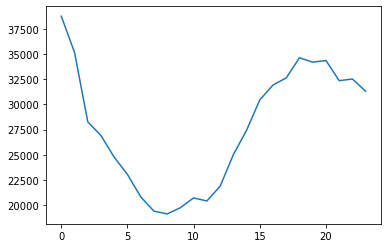

In [56]:
# number of tweets posted by hour. The repartition of the 665 777 tweets according to their post time.
plt.plot(range(24), ds.timestamp.value_counts().sort_index())

In [59]:
np.log(37000)

10.51867319162636

We can see below that the number of retweet a tweet gets is higher between 02:00 and 12:00

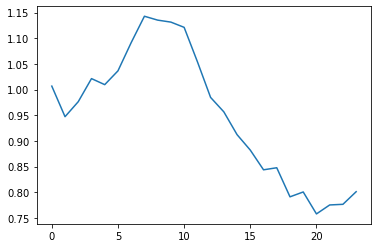

In [58]:
plt.plot(range(24), retweet_mean_per_hour)